In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn
import warnings
import calendar
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/Data Negara (1).xlsx')

In [3]:
df.head()

,Date,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
0,2022-04-26,A. First App Open,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
1,2022-04-26,B. Read Oboarding,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
2,2022-04-26,C. Sign Up,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-04-26,D. Load Topic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-04-26,E. Topic Choosed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Date'] = df['Date'].dt.strftime('%Y-%m') 

In [7]:
negara = df.columns.values[2:25]

In [ ]:
df_event = []
df_event = df[negara].groupby(df.Event).sum()
df_event = pd.DataFrame(df_event)
df_event = df_event.reset_index()
df_event.tail()

,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
9,J. Finish Hooray,1,0,0,22,0,4,596,7,45,...,9,28,20,8,5,0,29,32,30,4
10,K. Exercise Choosed,0,0,0,21,0,3,440,3,37,...,3,18,13,7,3,0,19,16,13,1
11,L. Exercise Choosed,0,0,0,21,0,3,440,3,37,...,3,18,13,7,3,0,19,16,13,1
12,M. Correct Answer Exercise,0,0,0,16,0,2,277,4,22,...,3,13,7,6,3,0,10,13,13,0
13,N. Finish Hooray,1,0,0,22,0,4,596,7,45,...,9,28,20,8,5,0,29,32,30,4


In [8]:
df_date = []
df_date = df[negara].groupby(df.Date).sum()
df_date = pd.DataFrame(df_date)
df_date = df_date.reset_index()
#df_date.head()

 # Top 3 Negara User Steps

In [9]:
df_top3 = df_date[:]
df_top3['Date'] = pd.to_datetime(df_top3['Date'])
df_top3['Month'] = df_top3['Date'].dt.month
df_top3['Month'] = df_top3['Month']

In [10]:
first_column = df_top3.pop('Month')
df_top3.insert(0, 'Month', first_column)
df_top3.drop('Date',axis=1, inplace=True)
df_top3['Month'] = df_top3['Month'].apply(lambda x: calendar.month_abbr[x])
df_top3

,Month,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
0,Apr,0,0,0,0,0,0,226,0,0,...,0,0,0,0,0,0,0,1,33,0
1,May,0,0,0,0,0,1,1246,0,204,...,0,0,0,0,0,352,0,175,593,0
2,Jun,0,0,0,0,0,8,1360,0,0,...,0,0,0,36,0,249,0,34,99,0
3,Jul,0,0,0,0,0,13,739,0,74,...,0,45,0,0,0,394,3,1,231,0
4,Aug,0,10,0,7,0,1,681,0,108,...,0,9,0,0,0,82,73,137,114,0
5,Sep,0,0,0,115,0,1,1156,0,24,...,0,0,0,0,35,531,5,6,174,0
6,Oct,0,0,0,74,0,15,695,62,19,...,0,0,92,4,0,722,0,8,57,0
7,Nov,22,5,4,87,14,42,1108,1,30,...,69,178,72,34,20,263,182,27,305,32


In [11]:
top_3 = df_top3.set_index('Month')
top_3.index.names = [None]
top_3_swap = top_3.transpose()
top_3_swap['Total'] = top_3_swap.iloc[:,:].sum(axis=1)
top_3_plot = top_3_swap['Total']
top_3_plot.sort_values()

Australia                  4
Georgia                   14
Armenia                   15
Angola                    22
Vietnam                   32
Morocco                   50
Sweden                    55
Kazakhstan                63
Serbia                    69
South Africa              74
German                    81
Russia                    85
Slovakia                 164
Netherlands              191
Singapore                232
Norway                   242
United Arab Emirates     263
Azerbaijan               283
United Kingdom           389
Mexico                   459
United Stated           1606
Turkey                  2593
Indonesia               7211
Name: Total, dtype: int64

In [12]:
top_3_plot = pd.DataFrame(top_3_plot)
top_3_plot.reset_index(inplace=True)
top_3_plot = top_3_plot.rename(columns = {'index':'Negara'})
top_3_plot = top_3_plot.loc[top_3_plot['Negara'].isin(['Indonesia','Turkey','United Stated','Mexico','United Kingdom','Azerbaijan'])]
top_3_plot = top_3_plot.sort_values(by='Negara')

[Text(0.5, 1.0, 'Top 5 Negara dengan Aktivitas User Step Terbanyak')]

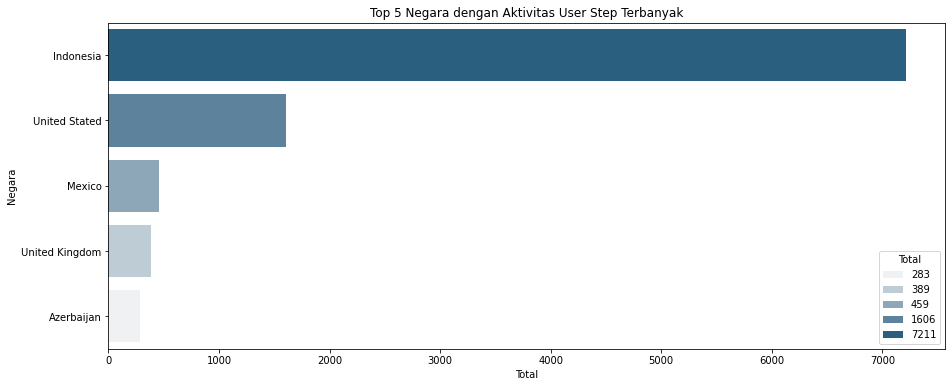

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data = top_3_plot,
            x='Total',
            y ='Negara',
            hue = "Total",
            ax=ax,
            dodge=False,
            order=top_3_plot.sort_values('Total',ascending = False).Negara, 
            color = '#1D628D').set(title='Top 5 Negara dengan Aktivitas User Step Terbanyak')

# Line Chart

In [14]:
df_line = df_date[:]

In [15]:
df_line['Date'] = pd.to_datetime(df_line['Date'])
df_line['Month'] = df_line['Date'].dt.month
df_line['Month'] = df_line['Month']

In [16]:
first_column = df_line.pop('Month')
df_line.insert(0, 'Month', first_column)
df_line.drop('Date',axis=1, inplace=True)
df_line['Month'] = df_line['Month'].apply(lambda x: calendar.month_abbr[x])
df_line

,Month,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
0,Apr,0,0,0,0,0,0,226,0,0,...,0,0,0,0,0,0,0,1,33,0
1,May,0,0,0,0,0,1,1246,0,204,...,0,0,0,0,0,352,0,175,593,0
2,Jun,0,0,0,0,0,8,1360,0,0,...,0,0,0,36,0,249,0,34,99,0
3,Jul,0,0,0,0,0,13,739,0,74,...,0,45,0,0,0,394,3,1,231,0
4,Aug,0,10,0,7,0,1,681,0,108,...,0,9,0,0,0,82,73,137,114,0
5,Sep,0,0,0,115,0,1,1156,0,24,...,0,0,0,0,35,531,5,6,174,0
6,Oct,0,0,0,74,0,15,695,62,19,...,0,0,92,4,0,722,0,8,57,0
7,Nov,22,5,4,87,14,42,1108,1,30,...,69,178,72,34,20,263,182,27,305,32


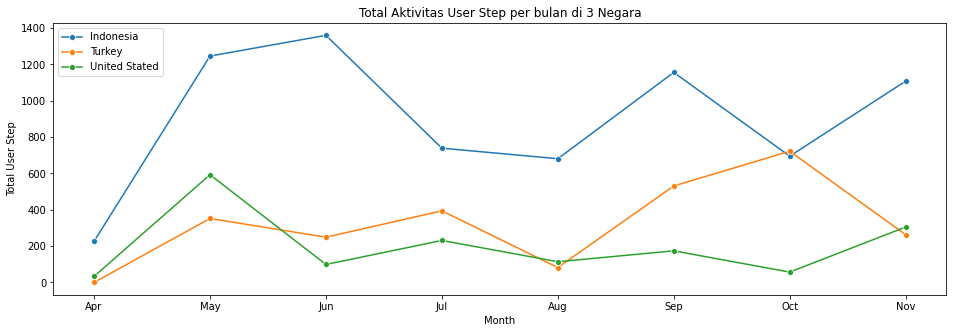

In [17]:
plt.figure(figsize=(16,5))
plt.title('Total Aktivitas User Step per bulan di 3 Negara')
sns.lineplot(x="Month", y="Indonesia", data=df_line,label='Indonesia',marker='o')
sns.lineplot(x="Month", y="Turkey", data=df_line,label='Turkey',marker='o')
sns.lineplot(x="Month", y="United Stated", data=df_line,label='United Stated',marker='o')
plt.legend(loc='upper left')
plt.ylabel("Total User Step")
plt.show()

# Conversion Rate Indonesia

In [ ]:
A = df.loc[df['Event'] == 'A. First App Open']
A.head(3)

,Date,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
0,2022-04,A. First App Open,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
14,2022-04,A. First App Open,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
28,2022-04,A. First App Open,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
A_INA = A['Indonesia'].groupby(A.Date).sum()
#A_USA = A['United Stated'].groupby(A.Date).sum()
#A_MXC = A['Mexico'].groupby(A.Date).sum()
A_INA = pd.DataFrame(A_INA)
#A_USA = pd.DataFrame(A_USA)
#A_MXC = pd.DataFrame(A_MXC)
#A_merge = pd.merge(pd.merge(A_INA,A_USA,on='Date'),A_MXC,on='Date')
A_INA = A_INA.reset_index()
A_INA.head()

,Date,Indonesia
0,2022-04,11
1,2022-05,29
2,2022-06,27
3,2022-07,13
4,2022-08,16


In [ ]:
'''A_merge.reset_index(inplace=True)
A_merge = A_merge.rename(columns = {'index':'Date'})
A_merge.head()'''

"A_merge.reset_index(inplace=True)\nA_merge = A_merge.rename(columns = {'index':'Date'})\nA_merge.head()"

In [ ]:
A_INA['Date'] = pd.to_datetime(A_INA['Date'])
A_INA['Month'] = A_INA['Date'].dt.month
#A_INA['Month'] = A_INA['Month']

In [ ]:
first_column = A_INA.pop('Month')
A_INA.insert(0, 'Month', first_column)
A_INA.drop('Date',axis=1, inplace=True)
A_INA['Month'] = A_INA['Month'].apply(lambda x: calendar.month_abbr[x])
A_INA

,Month,Indonesia
0,Apr,11
1,May,29
2,Jun,27
3,Jul,13
4,Aug,16
5,Sep,21
6,Oct,10
7,Nov,19


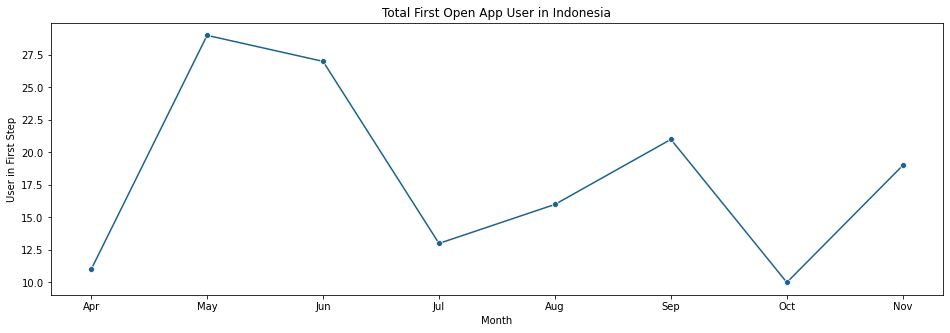

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Total First Open App User in Indonesia')
sns.lineplot(x="Month", y="Indonesia", data=A_INA,marker='o',color = '#1D628D')
plt.ylabel("User in First Step")
plt.show()

In [ ]:
N = df.loc[df['Event'] == 'N. Finish Hooray ']
N.head(3)

,Date,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
13,2022-04,N. Finish Hooray,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,2022-04,N. Finish Hooray,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41,2022-04,N. Finish Hooray,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
N_INA = N['Indonesia'].groupby(N.Date).sum()
N_INA = pd.DataFrame(N_INA)
N_INA = N_INA.reset_index()
N_INA.head()

,Date,Indonesia
0,2022-04,21
1,2022-05,102
2,2022-06,98
3,2022-07,64
4,2022-08,54


In [ ]:
N_INA['Date'] = pd.to_datetime(N_INA['Date'])
N_INA['Month'] = N_INA['Date'].dt.month
#N_INA['Month'] = N_INA['Month']

first_column = N_INA.pop('Month')
N_INA.insert(0, 'Month', first_column)
N_INA.drop('Date',axis=1, inplace=True)
N_INA['Month'] = N_INA['Month'].apply(lambda x: calendar.month_abbr[x])
N_INA

,Month,Indonesia
0,Apr,21
1,May,102
2,Jun,98
3,Jul,64
4,Aug,54
5,Sep,111
6,Oct,50
7,Nov,96


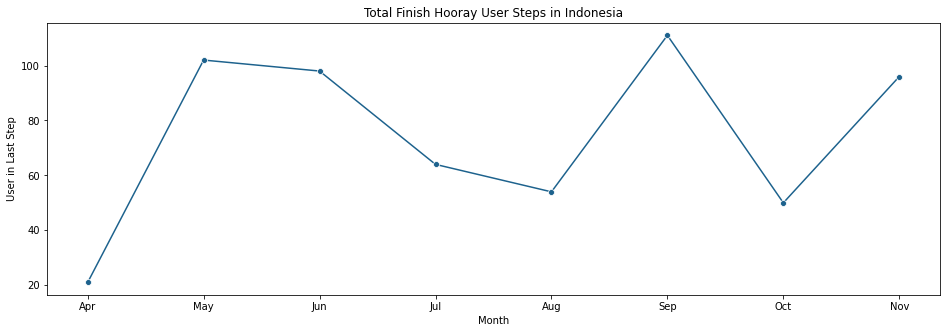

In [ ]:
plt.figure(figsize=(16,5))
plt.title('Total Finish Hooray User Steps in Indonesia')
sns.lineplot(x="Month", y="Indonesia", data=N_INA,marker='o',color = '#1D628D')
plt.ylabel("User in Last Step")
plt.show()

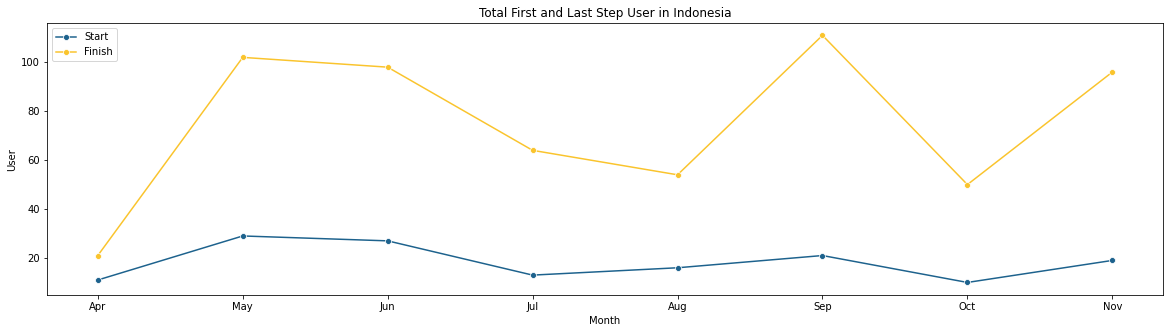

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Total First and Last Step User in Indonesia')
sns.lineplot(x="Month", y="Indonesia", data=A_INA,label='Start',marker='o',color = '#1D628D')
sns.lineplot(x="Month", y="Indonesia", data=N_INA,label='Finish',marker='o',color = '#FAC42D')
plt.legend(loc='upper left')
plt.ylabel("User")
plt.show()

In [ ]:
A_INA.rename(columns={"Indonesia": "Step_A"},inplace = True)
N_INA.rename(columns={"Indonesia": "Step_N"},inplace = True)

In [ ]:
INA = pd.merge(A_INA,N_INA, on='Month')
INA

,Month,Step_A,Step_N
0,Apr,11,21
1,May,29,102
2,Jun,27,98
3,Jul,13,64
4,Aug,16,54
5,Sep,21,111
6,Oct,10,50
7,Nov,19,96


In [ ]:
INA['Conversion(%)'] = ((INA['Step_N'] - INA["Step_A"]) / INA["Step_A"]) * 100
INA['Conversion(%)'] = INA['Conversion(%)'].astype(int)
INA

,Month,Step_A,Step_N,Conversion(%)
0,Apr,11,21,90
1,May,29,102,251
2,Jun,27,98,262
3,Jul,13,64,392
4,Aug,16,54,237
5,Sep,21,111,428
6,Oct,10,50,400
7,Nov,19,96,405


In [ ]:
INA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          8 non-null      object
 1   Step_A         8 non-null      int64 
 2   Step_N         8 non-null      int64 
 3   Conversion(%)  8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 620.0+ bytes


[Text(0.5, 1.0, 'Conversion Rate Tiap Bulan di Indonesia')]

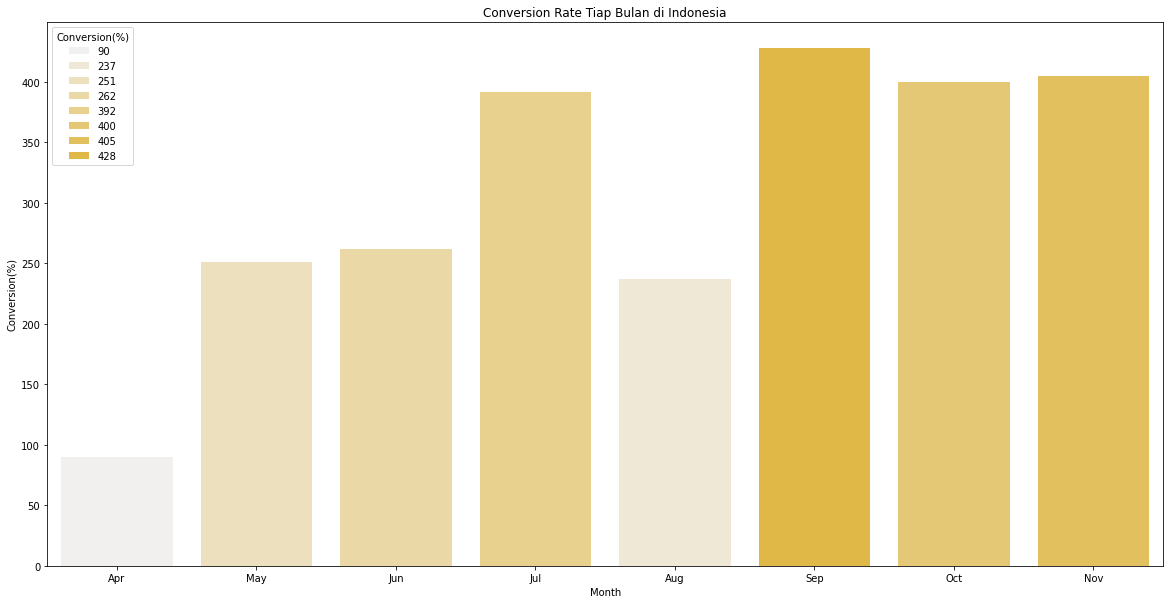

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data = INA,
            x='Month',
            y ='Conversion(%)',
            hue = "Conversion(%)",
            ax=ax,
            dodge=False,
            #order=top_3_plot.sort_values('Total',ascending = False).Negara, 
            color = '#FAC42D').set(title='Conversion Rate Tiap Bulan di Indonesia')

In [ ]:
INA.drop(columns='Conversion',inplace=True)